In [2]:
import geopandas
import glob
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
files = glob.glob('place/*.shp')
print(files)

['place/tl_2021_44_place.shp', 'place/tl_2021_55_place.shp', 'place/tl_2021_25_place.shp', 'place/tl_2021_30_place.shp', 'place/tl_2021_26_place.shp', 'place/tl_2021_17_place.shp', 'place/tl_2021_19_place.shp', 'place/tl_2021_53_place.shp', 'place/tl_2021_06_place.shp', 'place/tl_2021_34_place.shp', 'place/tl_2021_46_place.shp', 'place/tl_2021_56_place.shp', 'place/tl_2021_02_place.shp', 'place/tl_2021_21_place.shp', 'place/tl_2021_27_place.shp', 'place/tl_2021_18_place.shp', 'place/tl_2021_40_place.shp', 'place/tl_2021_36_place.shp', 'place/tl_2021_38_place.shp', 'place/tl_2021_31_place.shp', 'place/tl_2021_22_place.shp', 'place/tl_2021_42_place.shp', 'place/tl_2021_39_place.shp', 'place/tl_2021_37_place.shp', 'place/tl_2021_23_place.shp', 'place/tl_2021_60_place.shp', 'place/tl_2021_45_place.shp', 'place/tl_2021_04_place.shp', 'place/tl_2021_24_place.shp', 'place/tl_2021_49_place.shp', 'place/tl_2021_48_place.shp', 'place/tl_2021_41_place.shp', 'place/tl_2021_12_place.shp', 'place/tl

In [58]:


files = ['/home/shumway743/cis5500_group/geo/state/tl_2021_us_state.shp']
for file in files:
    shp_file = geopandas.read_file(file)
    shp_file1 = shp_file.simplify(tolerance=.01)
    # shp_file1.to_file(file + '_simple.geojson', driver='GeoJSON')

In [59]:
shp_file['simple'] = shp_file1
shp_file['geojson'] = shp_file.simple.apply(lambda x: geopandas.GeoSeries([x]).to_json())
shp_file.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,simple,geojson
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428...","POLYGON ((-80.85847 37.42831, -80.88325 37.383...","{""type"": ""FeatureCollection"", ""features"": [{""i..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...","MULTIPOLYGON (((-83.10874 24.62949, -83.08845 ...","{""type"": ""FeatureCollection"", ""features"": [{""i..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067...","POLYGON ((-89.17208 37.06831, -89.17935 37.021...","{""type"": ""FeatureCollection"", ""features"": [{""i..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295...","POLYGON ((-92.74568 45.29604, -92.76200 45.288...","{""type"": ""FeatureCollection"", ""features"": [{""i..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373...","POLYGON ((-75.76659 39.37756, -75.69367 38.460...","{""type"": ""FeatureCollection"", ""features"": [{""i..."


In [60]:
shp_file.STATEFP = shp_file.STATEFP.astype(int)

In [61]:
states = pd.read_csv('/home/shumway743/cis5500_group/census/data/backup/state_2021_census_api_p.csv')
shp_file = shp_file.merge(states[['GEO_ID','state']],left_on='STATEFP',right_on='state')

shp_file.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,simple,geojson,GEO_ID,state
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428...","POLYGON ((-80.85847 37.42831, -80.88325 37.383...","{""type"": ""FeatureCollection"", ""features"": [{""i...",0400000US54,54
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...","MULTIPOLYGON (((-83.10874 24.62949, -83.08845 ...","{""type"": ""FeatureCollection"", ""features"": [{""i...",0400000US12,12
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067...","POLYGON ((-89.17208 37.06831, -89.17935 37.021...","{""type"": ""FeatureCollection"", ""features"": [{""i...",0400000US17,17
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295...","POLYGON ((-92.74568 45.29604, -92.76200 45.288...","{""type"": ""FeatureCollection"", ""features"": [{""i...",0400000US27,27
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373...","POLYGON ((-75.76659 39.37756, -75.69367 38.460...","{""type"": ""FeatureCollection"", ""features"": [{""i...",0400000US24,24


In [64]:
out = shp_file.drop(['geometry','simple'],axis=1)
out['type']='state'
out = out[['GEO_ID','type','geojson']].rename({'GEO_ID':'geo_id'},axis=1).set_index('geo_id')
out.to_csv('geo_out_state.csv')

In [57]:
#read in once
df_places = gpd.read_file('/home/shumway743/cis5500_group/geo/state/tl_2021_us_state.shp_simple.geojson')

In [10]:
df_places['geometry']
#same as df_places.plot()

0     POLYGON ((-80.85847 37.42831, -80.88325 37.383...
1     MULTIPOLYGON (((-83.10874 24.62949, -83.08845 ...
2     POLYGON ((-89.17208 37.06831, -89.17935 37.021...
3     POLYGON ((-92.74568 45.29604, -92.76200 45.288...
4     POLYGON ((-75.76659 39.37756, -75.69367 38.460...
5     MULTIPOLYGON (((-71.67881 41.15891, -71.63497 ...
6     POLYGON ((-111.04547 43.50105, -111.04671 42.0...
7     POLYGON ((-71.24548 42.74251, -71.29464 42.697...
8     POLYGON ((-76.91598 36.54388, -75.79750 36.550...
9     POLYGON ((-72.43462 43.23326, -72.45740 43.147...
10    POLYGON ((-72.52790 41.17777, -73.61289 40.950...
11    POLYGON ((-75.13846 39.00270, -75.01512 38.788...
12    POLYGON ((-104.84774 32.00041, -106.61849 32.0...
13    MULTIPOLYGON (((-116.10617 32.61848, -117.2049...
14    POLYGON ((-74.46493 39.29823, -74.62460 39.143...
15    POLYGON ((-87.11901 43.19082, -87.01994 42.493...
16    POLYGON ((-117.22005 44.30140, -117.17034 44.2...
17    POLYGON ((-95.93779 41.39075, -95.92968 41

<Axes: >

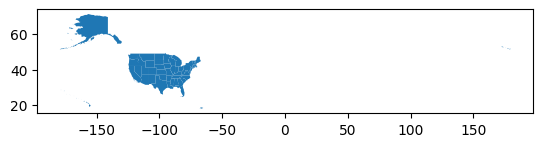

In [43]:
shp_file.simple.plot()